In [16]:
import tensorflow as tf
from keras.datasets import mnist

import matplotlib.pyplot as plt

In [8]:
json = open("../models/cae.json").read()
model = tf.keras.models.model_from_json(json)
model.load_weights("../models/cae.weights.h5")

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
re_lu (ReLU)                 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 3, 3, 128)         0         
__________

In [27]:
outputs = [layer.output for layer in model.layers[2:6]]
intermediate_model = tf.keras.models.Model(inputs=model.inputs, outputs=outputs)

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

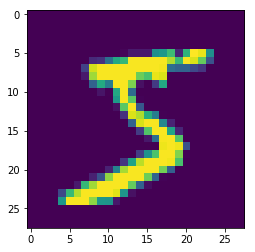

In [17]:
plt.imshow(x_train[0])

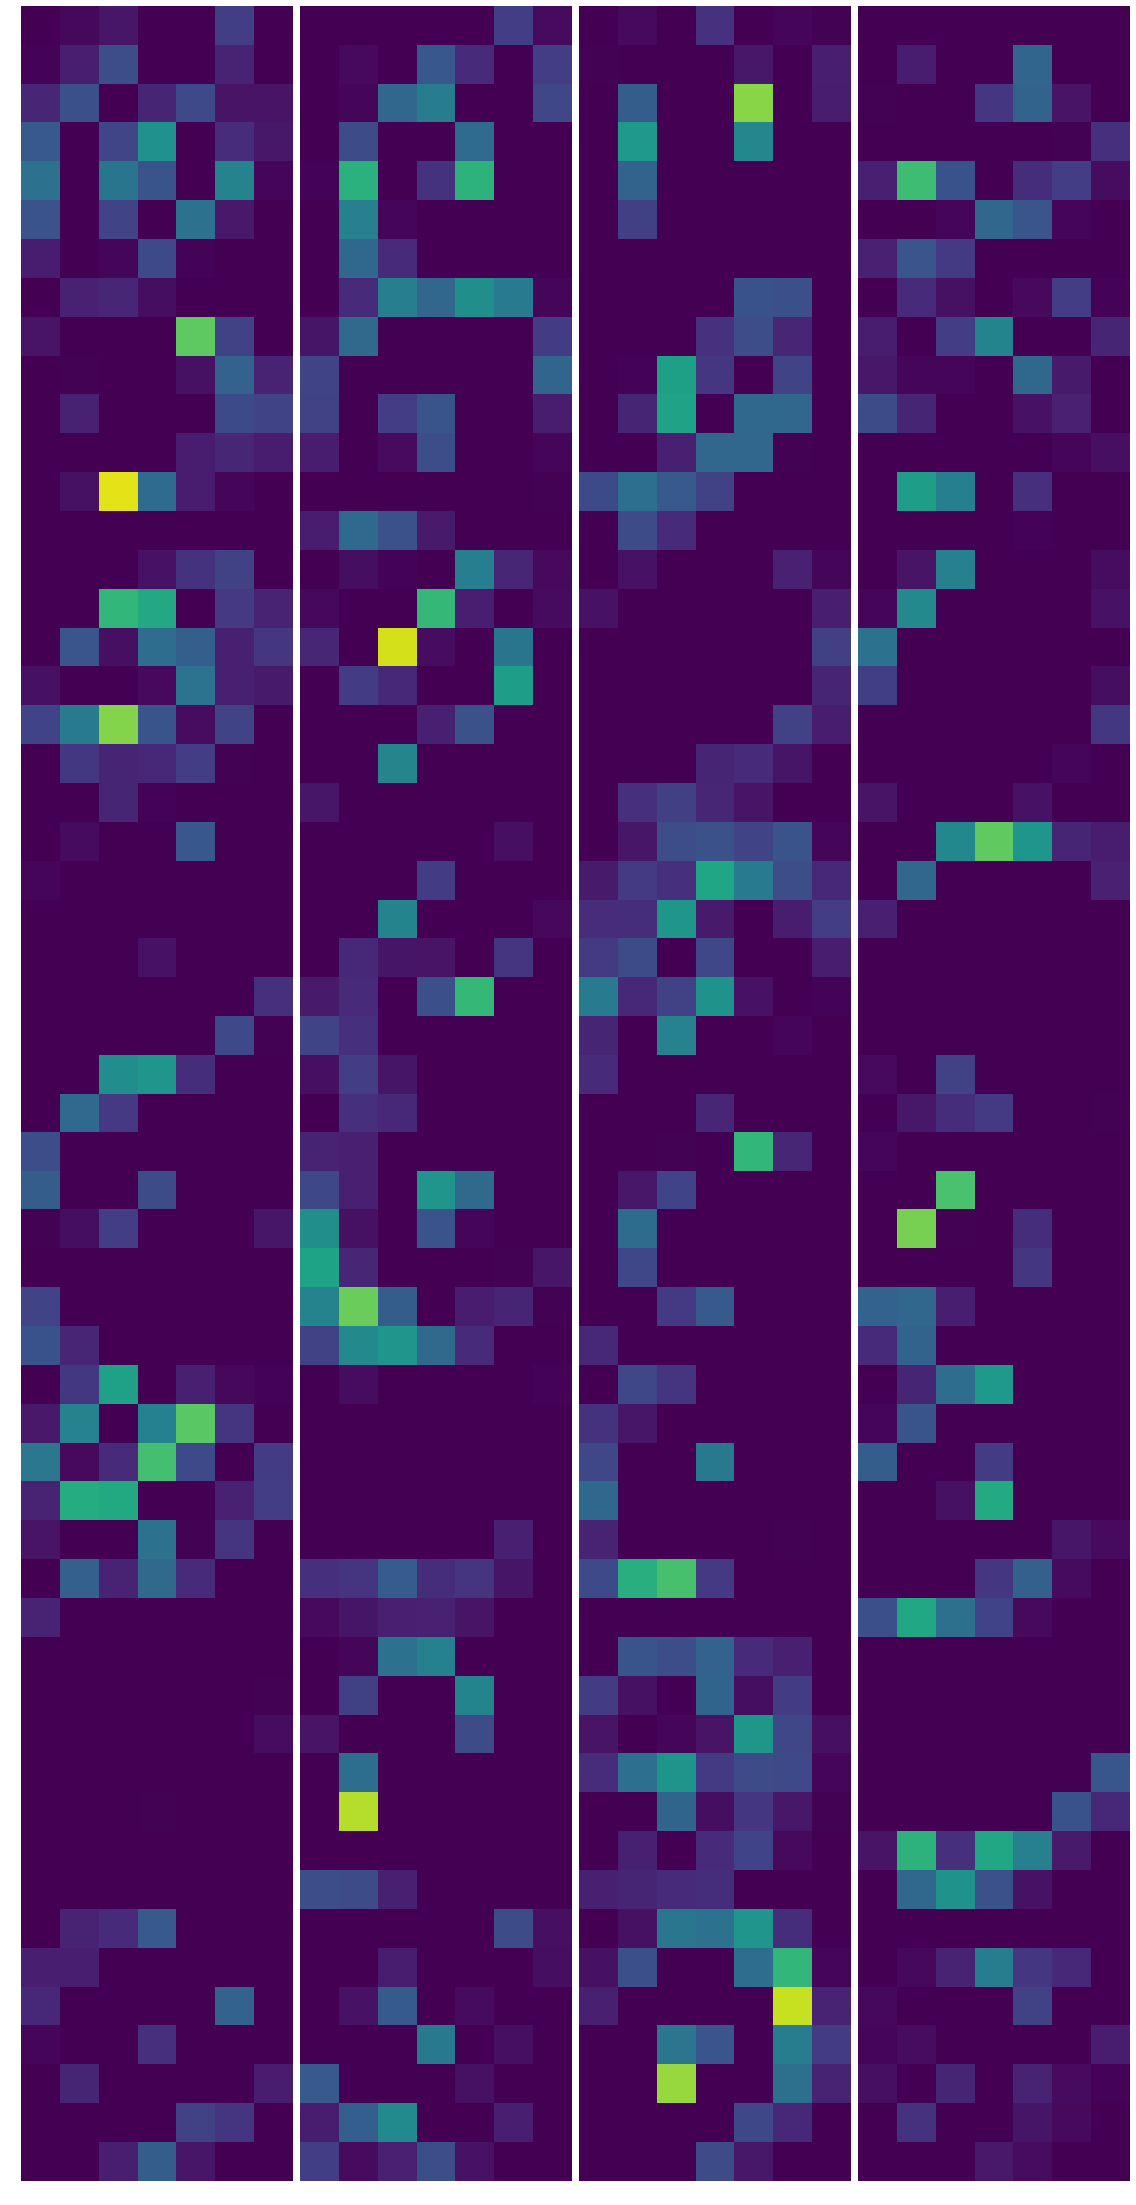

In [43]:
lo = layer_outputs[2]
layer_outputs = intermediate_model.predict(x_train[1].reshape(1, -1))
fig, axs = plt.subplots(
                figsize=(20,40),
                nrows=8,
                ncols=4,
                gridspec_kw={'wspace':0, 'hspace':0},
                squeeze=True)
i = 0
for row in axs:
    for ax in row:
        img = lo[:, :, :, i]
        im_shape = lo.shape[1]
        img = img.reshape((im_shape, im_shape))
        ax.axis("off")
        ax.imshow(img, vmin=lo.min(), vmax=lo.max())
        i+=1

(1, 14, 14, 32)